In [ ]:
# Run this cell to download the course materials and functions.
import os
import sys

# Clone the repository
!git clone https://github.com/Stephen-Robbins/Math_of_Finance.git

# Change directory to the repository's root
%cd Math_of_Finance

# --- Important: Add the 'scripts' directory to Python's search path ---
# Get the absolute path to the 'scripts' folder. This is crucial for portability.
scripts_path = os.path.join(os.getcwd(), "scripts")

# Add the scripts directory to Python's path
if scripts_path not in sys.path:  # Avoid adding it multiple times
    sys.path.insert(0, scripts_path)



### Implied Volatility (IV)

- **Definition:** The implied volatility $\sigma_{imp}$ is the volatility that, when input into the Black–Scholes model, yields the observed market price of the option.

- Mathematically:

$$
C_{market} = C_{BS}(S, E, r, T, \sigma_{imp})
$$

$C_{market}$ = Observed option market price  
$C_{BS}$ = Black–Scholes theoretical price

- Implied volatility is solved numerically (e.g., Newton-Raphson).

---

###  Volatility Smile

- **Definition:** The volatility smile (or skew) describes how implied volatility varies with strike price ($E$) and maturity ($T$).

- Typical equity market observation:
  - Higher IV for deep out-of-the-money (OTM) puts.
  - Lower IV near at-the-money (ATM).

- Reasoning:
  - Market fear of crashes (left-tail risk).
  - Supply-demand dynamics.






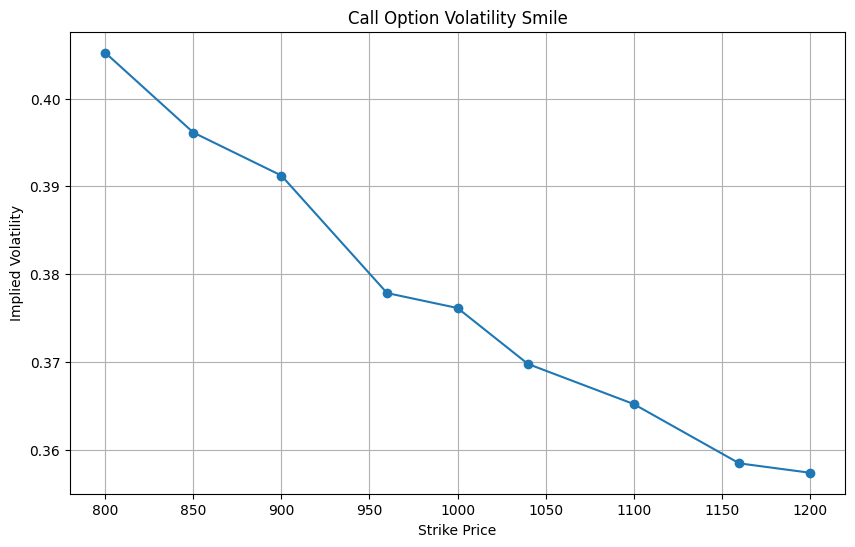

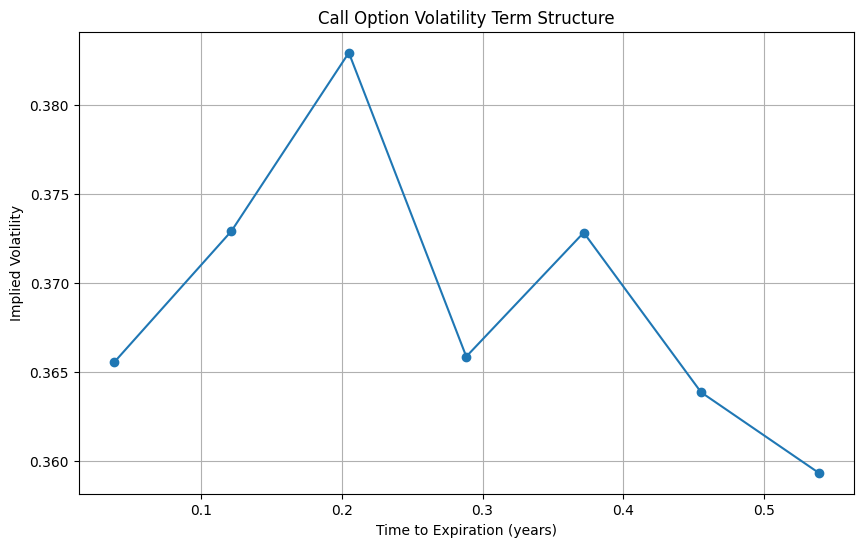

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from plot import compute_and_plot_implied_volatility_smile, compute_and_plot_implied_volatility_term_structure


# Current stock price
S = 990.92
r = 0.05
T = 0.5

# Strike prices ranging from deep ITM to deep OTM
strikes = [800, 850, 900, 960, 1000, 1040, 1100, 1160, 1200]
# Market prices for call options with these strikes
call_premiums = [239, 202, 169, 132, 112, 93, 70, 51, 41.5]

# Plot the volatility smile
compute_and_plot_implied_volatility_smile(
    S=S, 
    E_range=strikes, 
    T=T, 
    r=r, 
    premiums=call_premiums, 
    option_type='call', 

    title='Call Option Volatility Smile',
    moneyness=False
)


# Example 2: Plotting a Volatility Term Structure
# Assume we have market data for options with varying expiration times

# Strike price (at-the-money)
E = 1000
# Times to expiration (in years)
times = [2/52,2/52+1/12, 2/52+2/12, 2/52+3/12, 2/52+4/12, 2/52+5/12, 2/52+6/12]
# Market prices for call options with these expirations
call_premiums_term = [25, 50, 69, 80,  94, 103 , 112]

# Plot the volatility term structure
compute_and_plot_implied_volatility_term_structure(
    S=S, 
    E=E, 
    T_range=times, 
    r=r, 
    premiums=call_premiums_term, 
    option_type='call', 
    
    title='Call Option Volatility Term Structure'
)





## Problem: Calendar Spread 

**Setup:**
Suppose a stock is trading today at \$100. Consider two European call options:

| Option | Maturity (months) | Strike Price | Option Price | Implied Volatility |
|--------|-------------------|--------------|--------------|--------------------|
| Call 1 | 1                 | \$100        | \$4.00       | 20%                |
| Call 2 | 3                 | \$100        | \$6.00       | 30%                |

Historical volatility has been stable around 22%. You believe implied volatility will revert closer to the historical volatility level.

- How could you structure a trade to exploit this volatility discrepancy?
- What are the potential risks and rewards?





## Problem: Butterfly Arbitrage

**Setup:**
Suppose an underlying stock trades at \$100. Three call options expiring in 2 months are available:

| Option | Strike Price | Market Price |
|--------|--------------|--------------|
| Call A | \$90        | \$14.00      | 
| Call B | \$100       | \$10.00       |
| Call C | \$110        | \$4.00     | 

The implied volatility appears unusually low in deep in-the-money (ITM) and out-of-the-money (OTM) strikes, relative to at-the-money (ATM). Asusme $r=0.02$.

- The price relationship between these options seems unusual. Analyze whether there is a butterfly arbitrage opportunity, and if so, construct a trading strategy to exploit it. Calculate the initial cash flow and the potential profit at expiration.



In [22]:
from finance import Option
S=100
r=0.02
T=1/6
A= Option(S=S, E=90, T=T, r=r, premium=14.00 , option_type='call')
B= Option(S=S, E=100, T=T, r=r, premium=10 , option_type='call')
C= Option(S=S, E=110, T=T, r=r, premium=4.00 , option_type='call')





###  Historical (Realized) Volatility Calculation

- Compute returns $r_t$ as log returns:

$$
r_t = \ln\left(\frac{S_t}{S_{t-1}}\right)
$$

- Calculate volatility (standard deviation of returns):

$$
\sigma_{hist} = \sqrt{\frac{1}{n-1}\sum_{t=1}^{n}(r_t - \bar{r})^2}
$$

- Annualize volatility (assuming daily returns):

$$
\sigma_{annual} = \sigma_{hist} \times \sqrt{252}
$$
> Typically, there are 252 trading days per year.




In [23]:
from finance import annualized_volatility
returns =[142.50, 145.75, 144.30, 146.80, 149.25, 147.90, 150.40, 152.65, 151.20, 153.80]
annualized_volatility, daily_volatility, daily_mean=annualized_volatility(returns)
print(annualized_volatility)

0.3905148940766109




## Problem Statement

You are given the following closing prices for a stock over 10 consecutive trading days. Calculate the annual historical (realized) volatility.

| Trading Day | Closing Price ($) |
|-------------|-------------------|
| 1           | 142.50            |
| 2           | 145.75            |
| 3           | 144.30            |
| 4           | 146.80            |
| 5           | 149.25            |
| 6           | 147.90            |
| 7           | 150.40            |
| 8           | 152.65            |
| 9           | 151.20            |
| 10          | 153.80            |




### Adjusting Black–Scholes for Continuous Dividends

- The original Black–Scholes call formula (no dividends):

$$
C = S_0 N(d_1) - E e^{-rT}N(d_2)
$$

- Adjust for continuous dividend yield $q$:

$$
C = S_0 e^{-qT} N(d_1) - E e^{-rT} N(d_2)
$$

- Updated $d_1$ and $d_2$:

$$
d_1 = \frac{\ln\left(\frac{S_0}{E}\right) + (r - q + \frac{\sigma^2}{2})T}{\sigma\sqrt{T}}
$$

$$
d_2 = d_1 - \sigma\sqrt{T}
$$

> $q$ = continuous dividend yield, annualized  
> $r$ = risk-free interest rate  
> $S_0$ = current underlying asset price


## Problem 

You are a quantitative analyst at a trading firm. A stock currently trades at $85 per share and pays a continuous dividend yield of 3% annually. You need to price a European call option with the following characteristics:

- Strike price: $90
- Time to expiration: 6 months (0.5 years)
- Risk-free interest rate: 2.5% annually
- Volatility: 25% annually

